In [1]:
#Imports
from pathlib import Path

import valenspy as vp
import xarray as xr
from datatree import DataTree

#First make an inputconverter object - assume that all the data is already in the correct format (which it will likely not be)
from valenspy.inputconverter_functions import _non_convertor

In [2]:
#Import Converter - This input converter will not do anything to the data.
ic = vp.InputConverter(_non_convertor)

In [5]:
#Observational dataset
EOBS_data_dir = Path("/dodrio/scratch/projects/2022_200/project_input/External/observations/EOBS/0.1deg/")

EOBS_obs_files = list(EOBS_data_dir.glob("*tg*mean*.nc")) #Select all the netCDF files in the directory
EOBS_obs_files = ic.convert_input(EOBS_obs_files) #Convert the input to the correct format

EOBS_ds = xr.open_mfdataset(EOBS_obs_files, combine='by_coords', chunks='auto')

#THIS SHOULD ALL BE IN THE INPUT CONVERTER FOR THE DATASET
EOBS_ds = EOBS_ds.rename_vars({"tg": "tas"})
EOBS_ds = EOBS_ds.rename({"latitude": "lat", "longitude": "lon"})
#Convert from Celsius to Kelvin
EOBS_ds["tas"] = EOBS_ds["tas"] + 273.15

#Select a small region covering Belgium for testing
EOBS_ds = EOBS_ds.sel(time=slice("1953-01-01", "1954-12-31"))
EOBS_ds = EOBS_ds.sel(lat=slice(49, 51), lon=slice(3, 5))

EOBS_ds

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 20, lon: 20, time: 730)
Coordinates:
  * lat      (lat) float64 160B 49.05 49.15 49.25 49.35 ... 50.75 50.85 50.95
  * lon      (lon) float64 160B 3.05 3.15 3.25 3.35 3.45 ... 4.65 4.75 4.85 4.95
  * time     (time) datetime64[ns] 6kB 1953-01-01 1953-01-02 ... 1954-12-31
Data variables:
    tas      (time, lat, lon) float32 1MB dask.array<chunksize=(26, 20, 20), meta=np.ndarray>
Attributes:
    E-OBS_version:  29.0e
    Conventions:    CF-1.4
    References:     http://surfobs.climate.copernicus.eu/dataaccess/access_eo...
    history:        Fri Mar 22 09:55:59 2024: ncks --no-abc -d time,0,27027 /...
    NCO:            netCDF Operators version 5.1.4 (Homepage = http://nco.sf....

In [6]:
#CMIP6 dataset
#Now make an ensemble member object
EC_Earth3_dir = Path("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/ValEnsPy/tests/data")
EC_Earth3_hist_files = list(EC_Earth3_dir.glob("*historical*.nc")) #Select all the netCDF files in the directory
EC_Earth3_hist_files = ic.convert_input(EC_Earth3_hist_files) #Convert the input to the correct format
EC_Earth3_ds = xr.open_mfdataset(EC_Earth3_hist_files, combine='by_coords', chunks='auto')
EC_Earth3_ds

<xarray.Dataset> Size: 13MB
Dimensions:    (time: 24, bnds: 2, lat: 256, lon: 512)
Coordinates:
  * time       (time) datetime64[ns] 192B 1953-01-16T12:00:00 ... 1954-12-16T...
  * lat        (lat) float64 2kB -89.46 -88.77 -88.07 ... 88.07 88.77 89.46
  * lon        (lon) float64 4kB 0.0 0.7031 1.406 2.109 ... 357.9 358.6 359.3
    height     float64 8B 2.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 384B dask.array<chunksize=(12, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 98kB dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 197kB dask.array<chunksize=(12, 512, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 13MB dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
Attributes: (12/46)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        CMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              29219.0
    contact:                            cmip6-data@ec-earth.org
    ...                                 ...
    variant_label:                      r1i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.4.0
    tracking_id:                        hdl:21.14100/18af2970-6a17-45fe-b629-...
    history:                            2019-06-06T07:27:13Z ; CMOR rewrote d...
    latest_applied_cmor_fixer_version:  v3.0

In [28]:
#Now make an "future" ensemble member object
EC_Earth3_ssp_files = list(EC_Earth3_dir.glob("*ssp245*.nc")) #Select all the netCDF files in the directory
EC_Earth3_ssp_files = ic.convert_input(EC_Earth3_ssp_files) #Convert the input to the correct format
EC_Earth3_ssp_ds = xr.open_mfdataset(EC_Earth3_ssp_files, combine='by_coords', chunks='auto')
EC_Earth3_ssp_ds

array([[[247.59041, 247.58086, 247.57132, ..., 247.60915, 247.6029 ,
         247.59665],
        [248.02892, 248.0114 , 247.99387, ..., 248.06499, 248.05296,
         248.04094],
        [248.39206, 248.36752, 248.34297, ..., 248.47719, 248.44882,
         248.42044],
        ...,
        [244.91049, 244.89246, 244.8744 , ..., 244.97095, 244.95079,
         244.93065],
        [244.81633, 244.80495, 244.79355, ..., 244.8542 , 244.84158,
         244.82895],
        [244.61665, 244.611  , 244.60533, ..., 244.63556, 244.62926,
         244.62296]],

       [[243.39784, 243.38968, 243.38153, ..., 243.41399, 243.4086 ,
         243.40323],
        [243.79959, 243.78441, 243.76921, ..., 243.83234, 243.82143,
         243.81052],
        [244.13121, 244.10518, 244.07913, ..., 244.22812, 244.19582,
         244.16351],
        ...,
        [243.2855 , 243.28401, 243.28252, ..., 243.29976, 243.29501,
         243.29027],
        [243.42897, 243.43228, 243.43561, ..., 243.43646, 243.43396,
   

In [30]:
dt = DataTree.from_dict({"obs/EOBS": EOBS_ds, "ensembles/cmip6/EC_Earth3/hist": EC_Earth3_ds, "ensembles/cmip6/EC_Earth3/ssp245": EC_Earth3_ssp_ds})
dt

array([[[247.59041, 247.58086, 247.57132, ..., 247.60915, 247.6029 ,
         247.59665],
        [248.02892, 248.0114 , 247.99387, ..., 248.06499, 248.05296,
         248.04094],
        [248.39206, 248.36752, 248.34297, ..., 248.47719, 248.44882,
         248.42044],
        ...,
        [244.91049, 244.89246, 244.8744 , ..., 244.97095, 244.95079,
         244.93065],
        [244.81633, 244.80495, 244.79355, ..., 244.8542 , 244.84158,
         244.82895],
        [244.61665, 244.611  , 244.60533, ..., 244.63556, 244.62926,
         244.62296]],

       [[243.39784, 243.38968, 243.38153, ..., 243.41399, 243.4086 ,
         243.40323],
        [243.79959, 243.78441, 243.76921, ..., 243.83234, 243.82143,
         243.81052],
        [244.13121, 244.10518, 244.07913, ..., 244.22812, 244.19582,
         244.16351],
        ...,
        [243.2855 , 243.28401, 243.28252, ..., 243.29976, 243.29501,
         243.29027],
        [243.42897, 243.43228, 243.43561, ..., 243.43646, 243.43396,
   

In [31]:
#Apply some postprocessing operations on the datatree
pp = vp.Preprocessor()
pp.add_preprocessing_task(vp.preprocessing_tasks.Regrid(dt.obs.EOBS.ds, name="to_obs", description="Regrid the CMIP6 data to the EOBS grid"))
pp.add_preprocessing_task(vp.preprocessing_tasks.Area(dt.obs.EOBS.ds, name="to_obs", description="Select the common area of the EOBS grid"))

#Apply the preprocessing
dt.ensembles = pp.apply_preprocessing(dt.ensembles)

dt.ensembles.cmip6.EC_Earth3.ssp245.tas.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

In [11]:
#Apply a diagnostic operation
#First make a diagnostic object
from valenspy.diagnostic_functions import spatial_bias
from valenspy.diagnostic_visualizations import plot_spatial_bias

diag = vp.Model2Obs(spatial_bias, plot_spatial_bias, name="spatial_bias", description="Calculate the time averaged spatial bias between the model and the observations")

#Apply the diagnostic
ds = diag.apply(dt.ensembles.cmip6.EC_Earth3.hist, dt.obs.EOBS)

In [12]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    ds.compute()

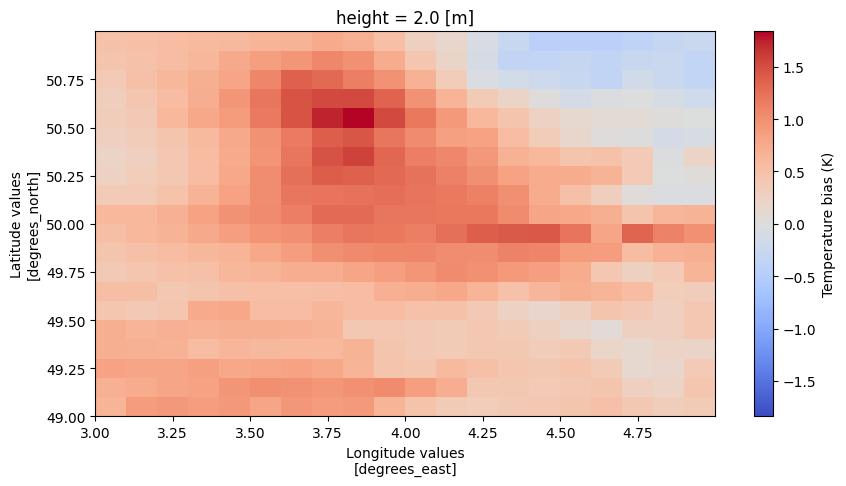

In [15]:
#Plot the resulting ds
#This takes long as all the preprocessing and diagnostics are being applied for the first time!
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ds.plot(ax=ax, cmap="coolwarm", cbar_kwargs={"label": "Temperature bias (K)"})
plt.show()

In [17]:
ds2 = diag.apply(dt.ensembles.cmip6.EC_Earth3.ssp245, dt.obs.EOBS)

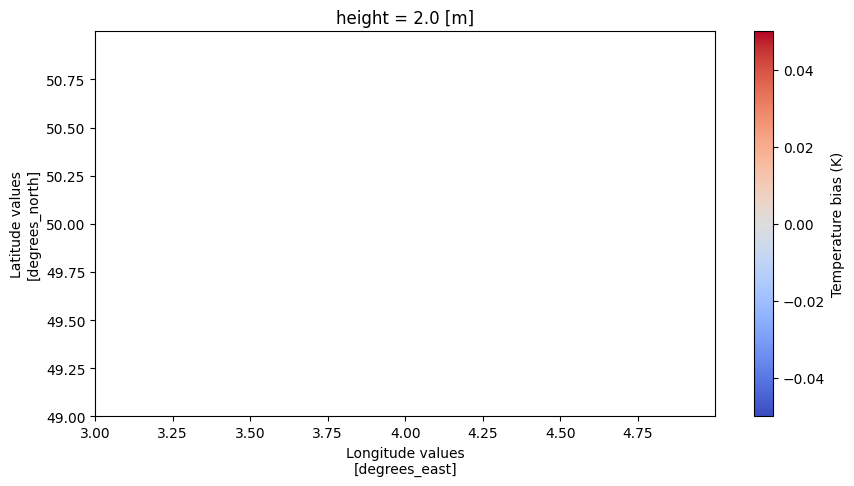

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ds2.plot(ax=ax, cmap="coolwarm", cbar_kwargs={"label": "Temperature bias (K)"})
plt.show()

In [24]:
(dt.ensembles.cmip6.EC_Earth3.ssp245.tas - dt.obs.EOBS.tas).max().values

dt.ensembles.cmip6.EC_Earth3.ssp245.tas.mean(dim="time")

array(nan)

In [26]:
dt.ensembles.cmip6.EC_Earth3.ssp245.tas.mean(dim="time").max().values

array(nan, dtype=float32)

In [27]:
dt.ensembles.cmip6.EC_Earth3.ssp245.tas.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan